In [1]:
import numpy as np
import pandas as pd
import cv2
import random
import os
import tensorflow as tf

2023-09-15 23:43:27.166322: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-15 23:43:27.200636: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-15 23:43:27.715284: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
from tqdm import tqdm
from inkmlparser import InkMLParser
from boundingbox import BoundingBoxUtils
from ssdboxes import SSDBoxes

In [3]:
ink_ml_parser = InkMLParser()

In [4]:
folder = "trainData_2012_part1/"

files = os.listdir("./data/train/" + folder)

equations = []

for file in tqdm(files):
    equation = ink_ml_parser.inkml_to_labelled_image("./data/train/" + folder + file)
    if (not equation == None):
        equations.append(equation)

  0%|          | 0/631 [00:00<?, ?it/s]


TypeError: get_traces_data() missing 1 required positional argument: 'inkml_file_abs_path'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


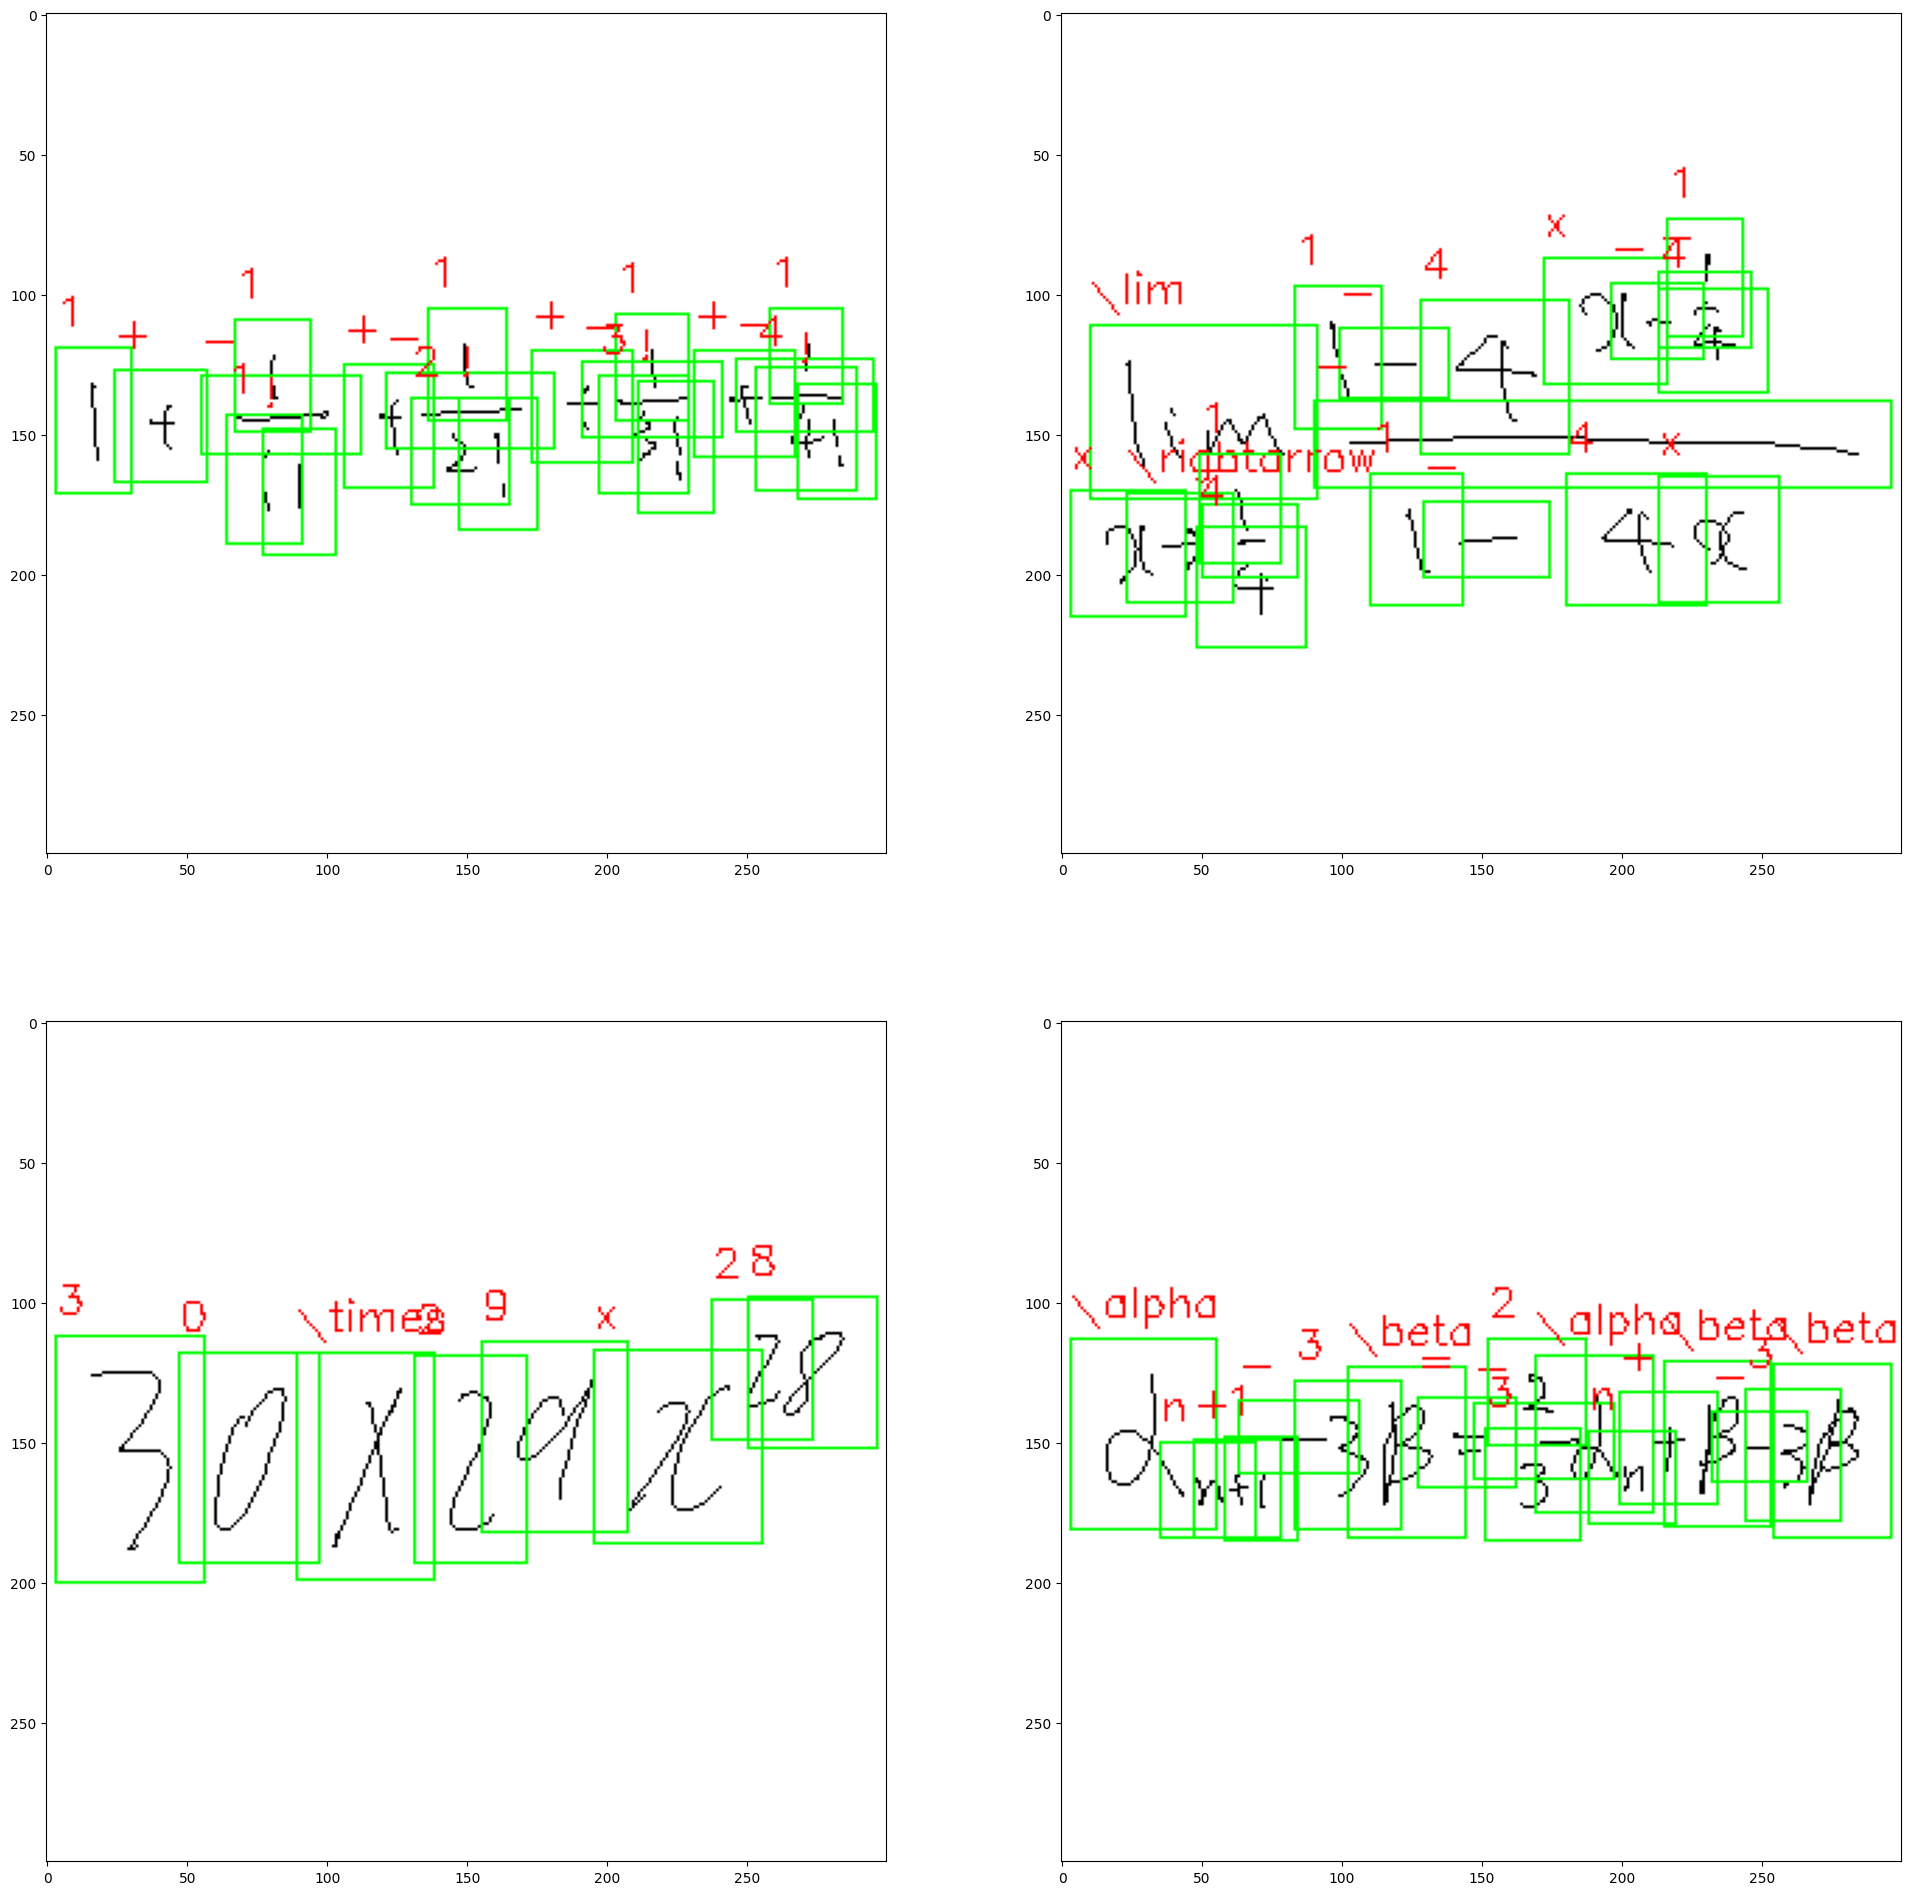

In [ ]:
fig = plt.figure(figsize=([24, 24]))

for i in range(4):
    fig.add_subplot(2, 2, i + 1)

    index = random.randint(0, len(equations) - 1)
    equation = equations[index]
    
    img = BoundingBoxUtils.draw_bounding_box(1 - equation[0], equation[2], labels=equation[1])

    plt.imshow(img)

In [ ]:
label_map = []

for equation in equations:
    label_map, equation[1] = ink_ml_parser.reorganize_labels(equation[1], label_map)
    equation[2] = BoundingBoxUtils.normalize(equation[2], equation[0].shape)

print(str(len(label_map)) + " symbols detected")

50 symbols detected


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[15, 20, 3, 11, 20, 2, 11, 20, 16, 15, 2, 20, 11, 7, 16]
['(', 'x', '3', '-', 'x', '2', '-', 'x', ')', '(', '2', 'x', '-', '7', ')']


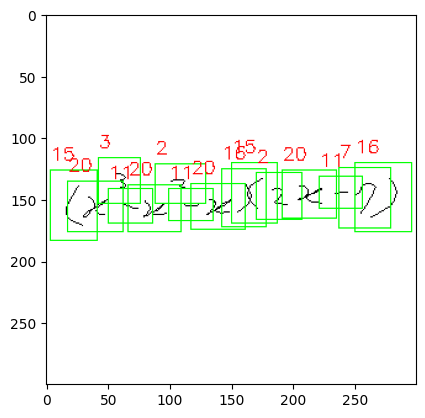

In [ ]:
index = random.randint(0, len(equations))
equation = equations[index]

img = BoundingBoxUtils.draw_bounding_box(1 - equation[0], equation[2], labels=equation[1], normalized=True)

print(equation[1])
print([label_map[label] for label in equation[1]])
plt.imshow(img)

2023-09-15 23:04:58.618373: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-15 23:04:58.634581: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-15 23:04:58.634956: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-15 23:04:58.639104: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-15 23:04:58.639384: I tensorflow/compile

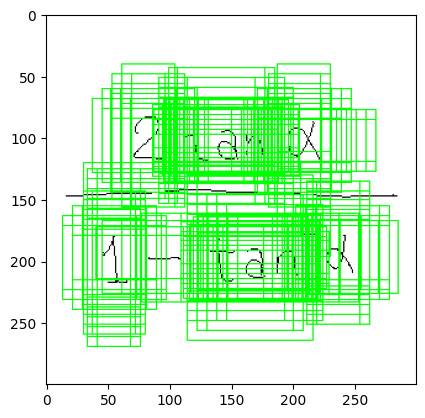

In [ ]:
default_boxes = SSDBoxes.create_default_boxes()

index = random.randint(0, len(equations))
equation = equations[index]

gt_boxes, matches = SSDBoxes.match_to_default_boxes(equation[2], default_boxes)
# gt_offsets = SSDBoxes.calculate_box_offsets(matches, gt_boxes, default_boxes)

img = BoundingBoxUtils.draw_bounding_box(1 - equation[0], tf.boolean_mask(default_boxes, tf.cast(matches, tf.bool)), normalized=True)

plt.imshow(img)

In [ ]:
# matched_equations = []

# for equation in equations:
#     label_map, equation[1] = InkMLParser.reorganize_labels(equation[1], label_map)
#     equation[2] = BoundingBoxUtils.normalize(equation[2], equation[0].shape)